**<h1><center> REEMPLAZO DE HERRAMIENTAS. </center></h1>**

Flores Carmona Jorge Emilio

Una empresa dispone de varias máquinas herramienta cuyas herramientas de corte
se desgastan constantemente. Cuando esto ocurre, la máquina es inservible. En la
actualidad el mantenimiento es correctivo reemplazándose una herramienta cuando falla. Dado que cada máquina dispone de una torre con cinco herramientas, se propone reemplazar toda la torre de herramientas (las cinco herramientas de golpe) cada vez que falle una, lo que debería reducir la frecuencia de desgaste de las herramientas. El tiempo necesario para el reemplazo de una herramienta es de una hora. Las cinco pueden reemplazarse en dos horas. El coste de una hora de máquina parada es de cien euros. Cada herramienta cuesta diez euros. La tabla siguiente recoge los datos de averías en el caso de sustituir una sola herramienta cada vez.

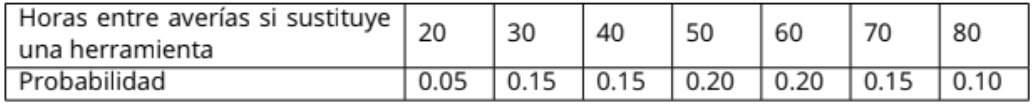

Si las cinco herramientas se cambian cada vez que una falla, la distribución de probabilidad entre fallos es la siguiente:

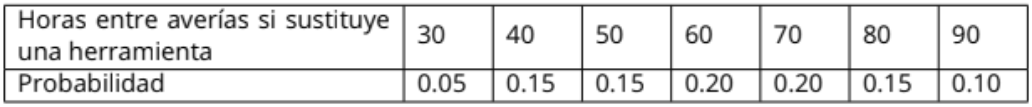

Determine mediante simulación la mejor política de reemplazo de las herramientas de corte.

### Solución por simulación

**1.** Identificamos las variables

$X=$Costo de averias
$H=$Horas de averias

Nuestras variables fias son las siguientes: 

$c_{h}$ = 10 (Costo por herramienta)

$c_{p}$ = 100 (Costo por el paro de una maquina durante una hora)

$t_1$ = 1 hora (Tiempo para cambiar una herramienta)

$t_5$ = 2 horas (Tiempo para cambiar 5 herramientas) 

**2.** Determine la distribución de probabilidad

Vemos que la distribución de probabilidad es la expresada en la imagen al inicio

**3.** Modelamos la variable aleatoria con las probabilidades indicadas

Creamos una lista aleatoria de periodicos con los porcentajes indicados haciendo uso de condicionales y la probabilidad acumulativa del problema

4. Modelo y objetivos del sistemas de simulación

El objetivo del siguiente sistema es simular la llegada de periodicos en un dia y determinar cual es el beneficio promedio si se piden 50 periodicos al dia.

Sea $h=$ Hora de averias nuestra variable aleatoria y los siguientes valores fijos son costos:

$c_{h}$ = 10 (Costo por herramienta)

$c_{p}$ = 100 (Costo por el paro de una maquina durante una hora)

$t_1$ = 1 hora (Tiempo para cambiar una herramienta)

$t_5$ = 2 horas (Tiempo para cambiar 5 herramientas)


Y el valor del costo total X(h)

**Paso 5**. Experimento: 

1.Generamos numeros aleatorios

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
def H_averias(): 
    h=0
    r = random.random() 
    if 0.0 <= r < 0.05:
        r = 20
    elif 0.05 <= r < 0.2:
        r = 30
    elif 0.2 <= r < 0.35:
        r = 40
    elif 0.35 <= r < 0.55:
        r = 50
    elif 0.55 <= r < 0.75:
        r = 60
    elif 0.75 <= r < 0.9:
        r = 70
    elif 0.90 <= r <= 1.00:
        r = 80
    return (r)

2. Simulamos la operacion a realizar

In [33]:

def MAQUINA():
    c_h = 10
    c_p = 100
    t_1 = 1  
    t_5 = 2 
    t= H_averias()
    costo_1 = c_h + c_p/t_1   
    costo_5 = 5*c_h + c_p/t_5 

    if t < t_5:
        costo_total = costo_5
    else:
        costo_total = costo_1*(t//t_1) + costo_5*(t//t_5)
        if t % t_1 != 0:
          costo_total += costo_1
    return(costo_total)

3. Realizamos el experimento n veces guardando los COSTOS

In [36]:
def experimento(n): #Hacemos el experimento n veces
    i = 0 #iterador que determinara las veces que se repetira el experimento
    c=0 #Contador de casos favorables
    Lista = [] #Lista donde se guardaran las probabilidades del caso solicitado
    while i<=n: #Hasta que el iterador sea igual al numero de veces que se repite el experimento este se llevara acabo
        c+=MAQUINA()
        i += 1
        p=c/i #probabilidad acumulativa
        Lista.append(p)
    return Lista 

4. Calculamos la media de COSTO

In [37]:
exp=experimento(5000)

In [38]:
print("El promedio de costos totales es de ", np.mean(exp))

El promedio de costos totales es de  8434.60102931518


5. Obtenemos la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

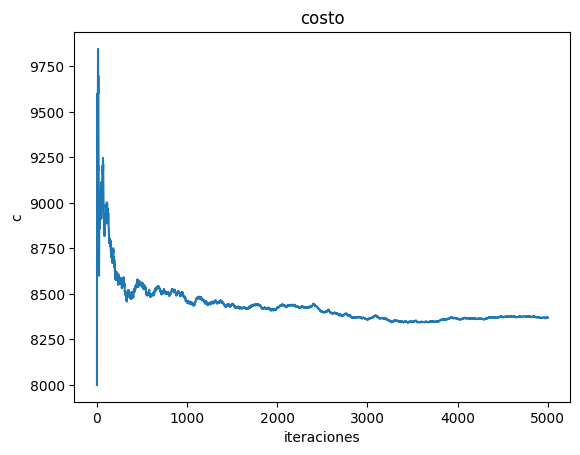

In [39]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('c')
plt.title('costo')
plt.show()

**PASO 6**. Replicamos el modelo.

In [42]:
def simulacion_operaciones(n):
    List = []
    for i in range(n):
        List.append(np.mean(experimento(5000)))
    return List

In [43]:
simulacion = simulacion_operaciones(500)

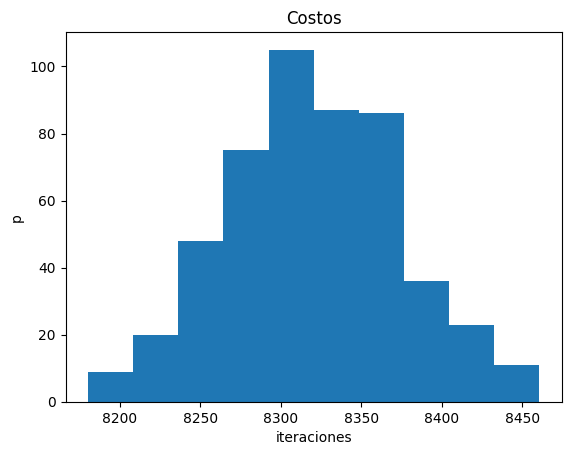

In [44]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Costos')
plt.show()

**PASO 7**. Calculamos la media

In [45]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

(8320.63086601965, 2921.928972563904, 54.05487001708453)

**PASO 8**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda 
al aire con un nivel de confianza del $95 \%$.

Calculamos primero el limite superior del intervalo de confianza con una certeza del 95% usando la siguiente formula 

$$L_{s}=\bar{x}+Z_{\frac{\alpha}{2}} \left(\frac{\sigma}{\sqrt{n}} \right)$$

In [47]:
p=np.mean(simulacion)
n=500
ls=p+(1.96*np.std(simulacion)/np.sqrt(n))
print(ls)

8325.368984283476


In [48]:
p=np.mean(simulacion)
n=500
li=p-(1.96*np.std(simulacion)/np.sqrt(n))
print(li)

8315.892747755825


Por lo tanto los intervalos de confianza son:

$$L_{i} \leq \mu \leq L_{s}$$


In [49]:
print(li,"<=", p,"<=", ls)

8315.892747755825 <= 8320.63086601965 <= 8325.368984283476
